In [1]:
import pandas as pd 
import os #for reading files
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
path = "./final_nus_datathon_dataset"


In [2]:
#!pip install pyarrow 
#^if you need to install pyarrow uncomment

In [3]:
dfs = dict()
files = os.listdir(path)

print("Naming Convention:")
for i in range(len(files)):
    _,*filename,_,_ = files[i].split("_") 
    dfs[filename[0]] = pd.read_parquet(f"{path}/{files[i]}") 
    print("dfs[\"",filename[0],"\"]", ":", files[i])
               


Naming Convention:
dfs[" policy "] : nus_policy_info_df.parquet
dfs[" client "] : nus_client_info_df.parquet
dfs[" final "] : sample_final_modelling_df.parquet
dfs[" agent "] : nus_agent_info_df.parquet


In [4]:
#e.g:
dfs["policy"]

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,prod_8,1,0,1,0,0,0,1,PG:0,AG05_35to39,TNR2_lt1yr
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,prod_8,1,0,1,0,0,0,1,PG:0,AG04_30to34,TNR4_4to8yr
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,prod_6,1,0,1,0,0,0,1,PG:0,AG07_45to49,TNR4_4to8yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,PID:22084,AIN:6527,CIN:15419,2012-10-30,4574.4,prod_4,1,0,1,0,0,0,1,PG:1,AG09_55to59,TNR4_4to8yr
29499,PID:13706,AIN:3472,CIN:17337,2008-09-01,267.0,prod_6,1,0,1,0,0,0,1,PG:0,AG06_40to44,TNR2_lt1yr
29500,PID:25287,AIN:7852,CIN:13015,2000-06-21,0.0,prod_4,1,0,0,1,0,0,1,PG:1,AG08_50to54,TNR5_8yrup
29501,PID:26334,AIN:8316,CIN:2239,2010-06-10,1152.0,prod_8,1,0,1,0,0,0,1,PG:0,AG03_25to29,TNR4_4to8yr


In [5]:
#removing NAs
for name in dfs:
    rows_before = len(dfs[name])
    dfs[name] = dfs[name].dropna() 
    rows_after = len(dfs[name])
    print(f"Dataset '{name}': Before {rows_before} After {rows_after}")

print("complete")

Dataset 'policy': Before 29503 After 29503
Dataset 'client': Before 20000 After 19647
Dataset 'final': Before 29503 After 29477
Dataset 'agent': Before 10129 After 10117
complete


In [6]:
#innerjoin on dataset
df_merged = pd.merge(dfs['policy'], dfs['client'], on='secuityno', how='inner')

df_merged = pd.merge(df_merged, dfs['agent'], on='agntnum', how='inner')

print(f"Final merged dataset shape: {df_merged.shape}")
print(df_merged.head())

Final merged dataset shape: (28970, 60)
    chdrnum agntnum  secuityno    occdate  annual_premium product  flg_main  \
0   PID:281  AIN:62   CIN:6957 2018-11-12             0.0  prod_8         1   
1   PID:280  AIN:63   CIN:2161 2024-02-22             7.0  prod_8         1   
2  PID:2577  AIN:63  CIN:16605 2024-08-28           423.0  prod_6         1   
3  PID:2578  AIN:63  CIN:16605 2024-08-27           217.0  prod_6         1   
4   PID:305  AIN:63   CIN:7917 2024-08-28           432.0  prod_6         1   

   flg_rider  flg_inforce  flg_lapsed  ...  pct_AG03_25to29  pct_AG04_30to34  \
0          0            1           0  ...         0.106383         0.148936   
1          0            1           0  ...         0.050439         0.260307   
2          0            1           0  ...         0.050439         0.260307   
3          0            1           0  ...         0.050439         0.260307   
4          0            1           0  ...         0.050439         0.260307   

   p

Summary Statistics:
                          occdate  annual_premium  flg_main  flg_rider  \
count                       28970     28970.00000   28970.0    28970.0   
mean   2020-10-03 19:16:34.380393      1073.05129       1.0        0.0   
min           1993-10-01 00:00:00         0.00000       1.0        0.0   
25%           2017-08-15 00:00:00         0.00000       1.0        0.0   
50%           2022-08-23 00:00:00       121.00000       1.0        0.0   
75%           2024-04-15 00:00:00       525.00000       1.0        0.0   
max           2024-11-28 00:00:00    300039.60000       1.0        0.0   
std                           NaN      4380.41527       0.0        0.0   

        flg_inforce    flg_lapsed  flg_cancel    flg_expire  flg_converted  \
count  28970.000000  28970.000000     28970.0  28970.000000        28970.0   
mean       0.764757      0.218088         0.0      0.017156            1.0   
min        0.000000      0.000000         0.0      0.000000            1.0   
2

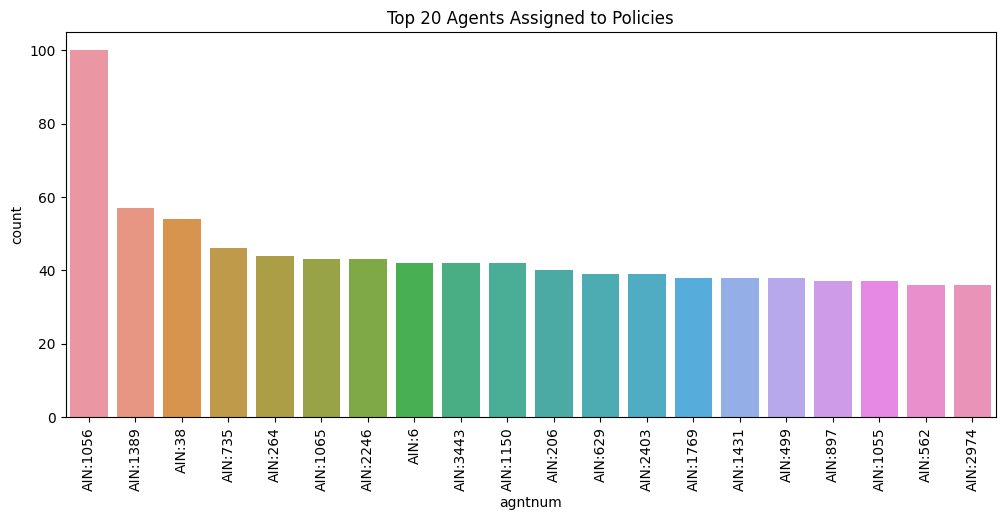

Agent Distribution:
agntnum
AIN:1056    100
AIN:1389     57
AIN:38       54
AIN:735      46
AIN:264      44
AIN:1065     43
AIN:2246     43
AIN:6        42
AIN:3443     42
AIN:1150     42
Name: count, dtype: int64


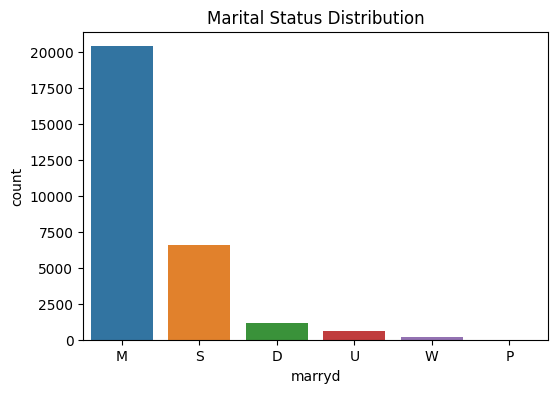

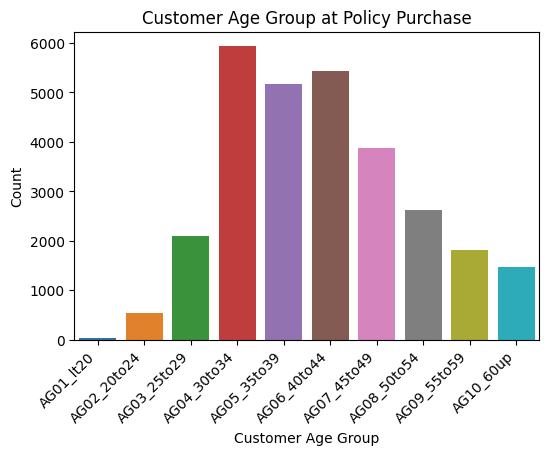

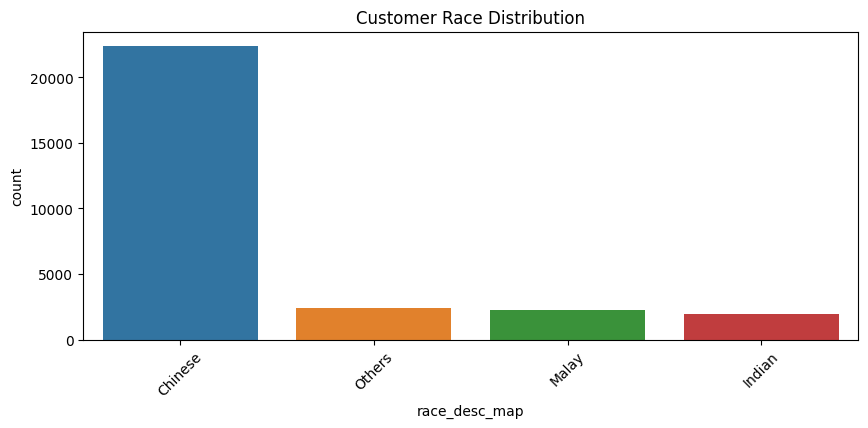

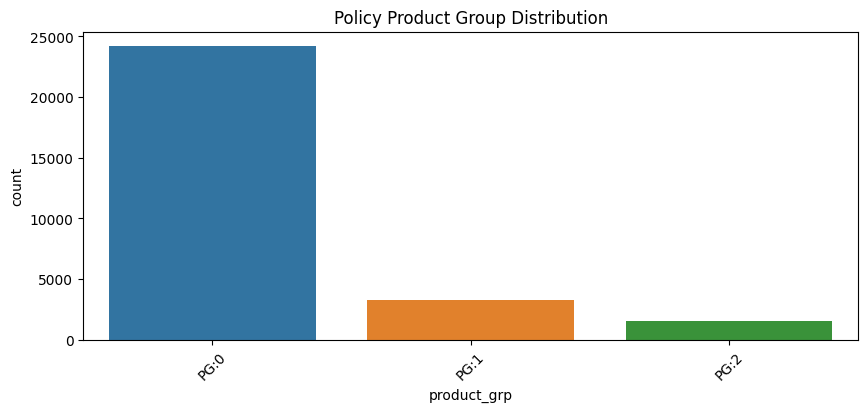

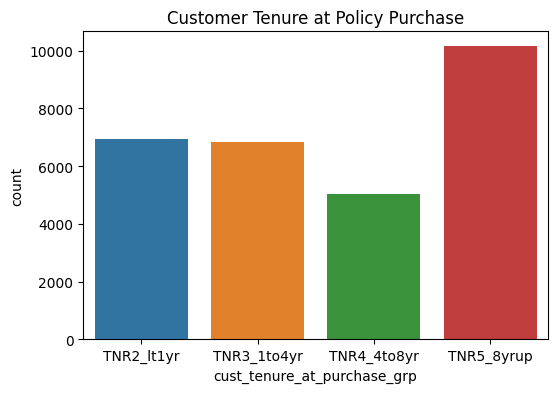

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


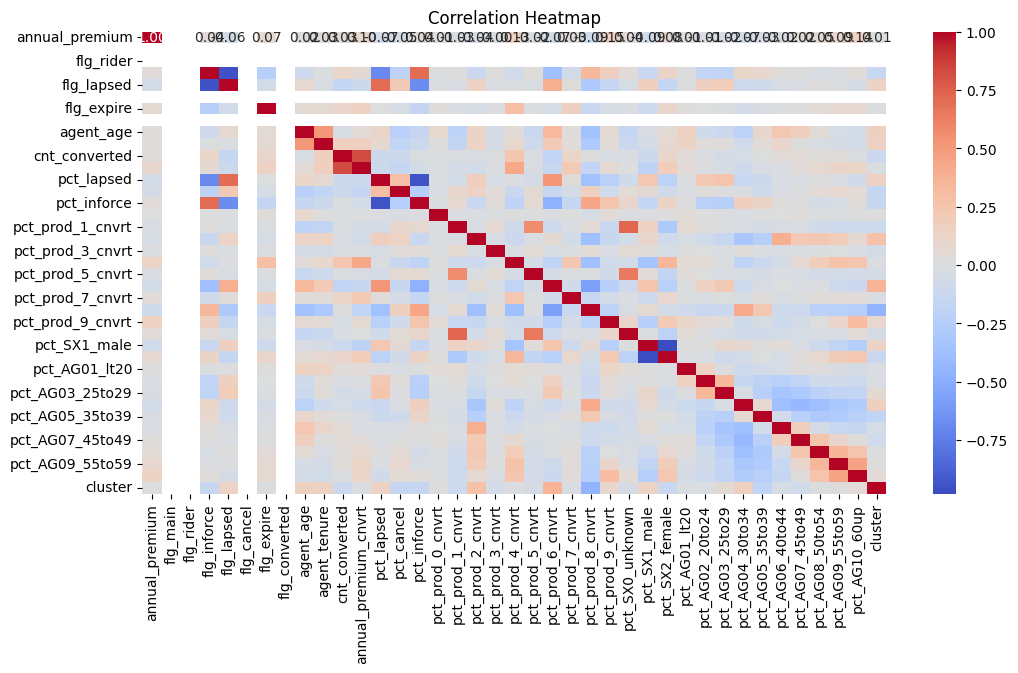

EDA Completed


In [7]:
#EDA
### Basic Dataset Overview
# print("Dataset Shape:", df_merged.shape)
# print("Column Data Types:")
# print(df_merged.dtypes)

### Summary Statistics for Numerical Columns
print("Summary Statistics:")
print(df_merged.describe())

### Target Variable Analysis (`agntnum` - Financial Advisor)
plt.figure(figsize=(12, 5))
sns.countplot(data=df_merged, x='agntnum', order=df_merged['agntnum'].value_counts().index[:20])  # Top 20 agents
plt.xticks(rotation=90)
plt.title("Top 20 Agents Assigned to Policies")
plt.show()

print("Agent Distribution:")
print(df_merged['agntnum'].value_counts().head(10))  # Print top 10 agents assigned

### Customer Demographics Analysis
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_merged, x='marryd')
plt.title("Marital Status Distribution")
plt.show()

# Age group distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_merged, x='cust_age_at_purchase_grp', order=sorted(df_merged['cust_age_at_purchase_grp'].unique()))
plt.xticks(rotation=45, ha="right") 
plt.title("Customer Age Group at Policy Purchase")
plt.xlabel("Customer Age Group")
plt.ylabel("Count")

# Show plot
plt.show()

# Race distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df_merged, x='race_desc_map', order=df_merged['race_desc_map'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Customer Race Distribution")
plt.show()

### Policy Data Analysis
# Product group distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df_merged, x='product_grp', order=df_merged['product_grp'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Policy Product Group Distribution")
plt.show()

# Customer tenure at policy purchase
plt.figure(figsize=(6, 4))
sns.countplot(data=df_merged, x='cust_tenure_at_purchase_grp', order=sorted(df_merged['cust_tenure_at_purchase_grp'].unique()))
plt.title("Customer Tenure at Policy Purchase")
plt.show()

### Correlation Heatmap (Numerical Features)
plt.figure(figsize=(12, 6))
sns.heatmap(df_merged.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("EDA Completed")